In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load dataset
df = pd.read_csv("heart.csv")  # Upload this file to Colab or mount Drive
print(df['target_multi'].value_counts())
# Drop duplicate rows if any
df = df.drop_duplicates()

# Features and target
X = df.drop(columns=["target_multi"])  # Replace with actual multi-class column name
y = df["target_multi"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save model and scaler
joblib.dump(model, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModel and Scaler saved successfully!")


target_multi
2    504
4    501
1    499
3    499
0    498
Name: count, dtype: int64
Model Accuracy: 0.9754

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.97      0.97      0.97       117
           2       0.97      1.00      0.99        73
           3       0.97      0.99      0.98        95
           4       1.00      0.96      0.98        72

    accuracy                           0.98       447
   macro avg       0.98      0.98      0.98       447
weighted avg       0.98      0.98      0.98       447


Confusion Matrix:
[[ 87   3   0   0   0]
 [  2 113   2   0   0]
 [  0   0  73   0   0]
 [  0   1   0  94   0]
 [  0   0   0   3  69]]

Model and Scaler saved successfully!


<ipython-input-95-38cc22b830ab>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


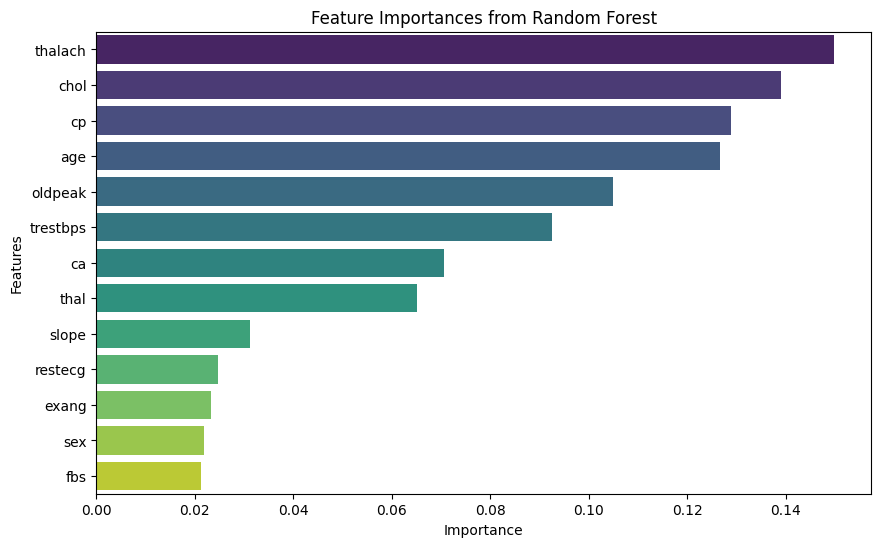

In [95]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


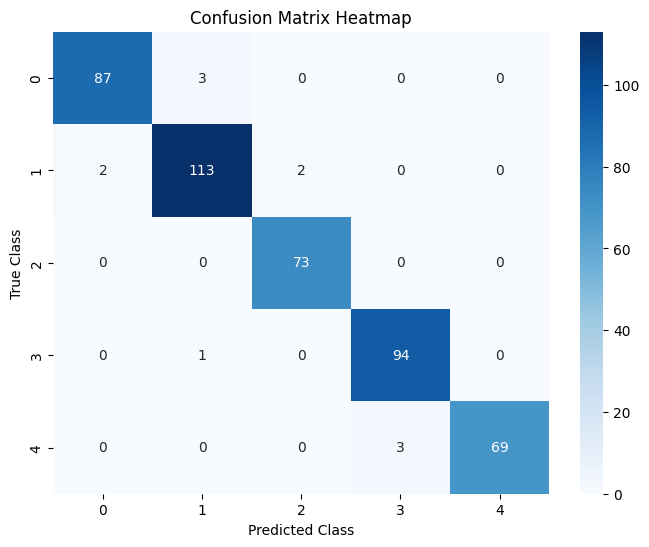

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


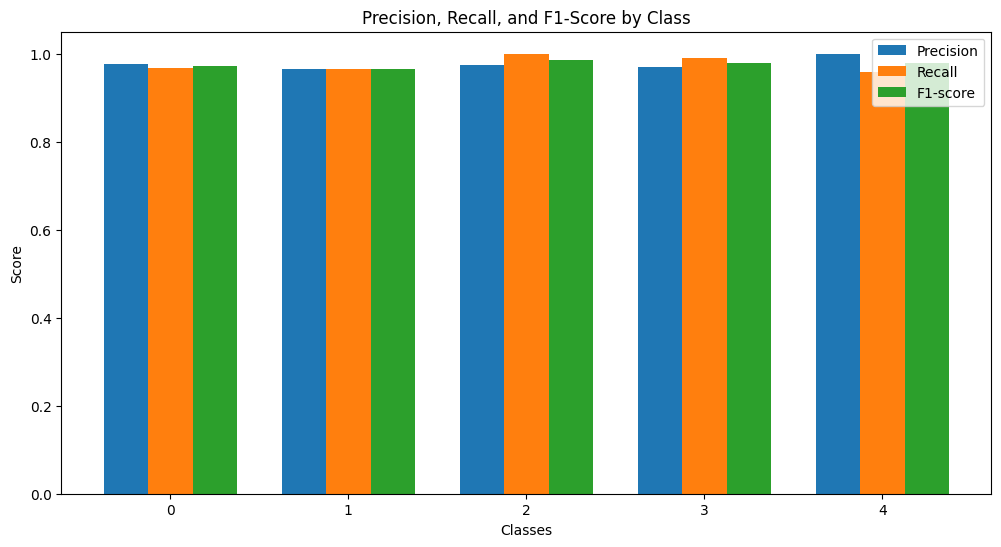

In [98]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

plt.figure(figsize=(12,6))
bar_width = 0.25
classes = np.unique(y_test)

r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, precision, width=bar_width, label='Precision')
plt.bar(r2, recall, width=bar_width, label='Recall')
plt.bar(r3, f1, width=bar_width, label='F1-score')

plt.xlabel('Classes')
plt.xticks([r + bar_width for r in range(len(classes))], classes)
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score by Class')
plt.legend()
plt.show()


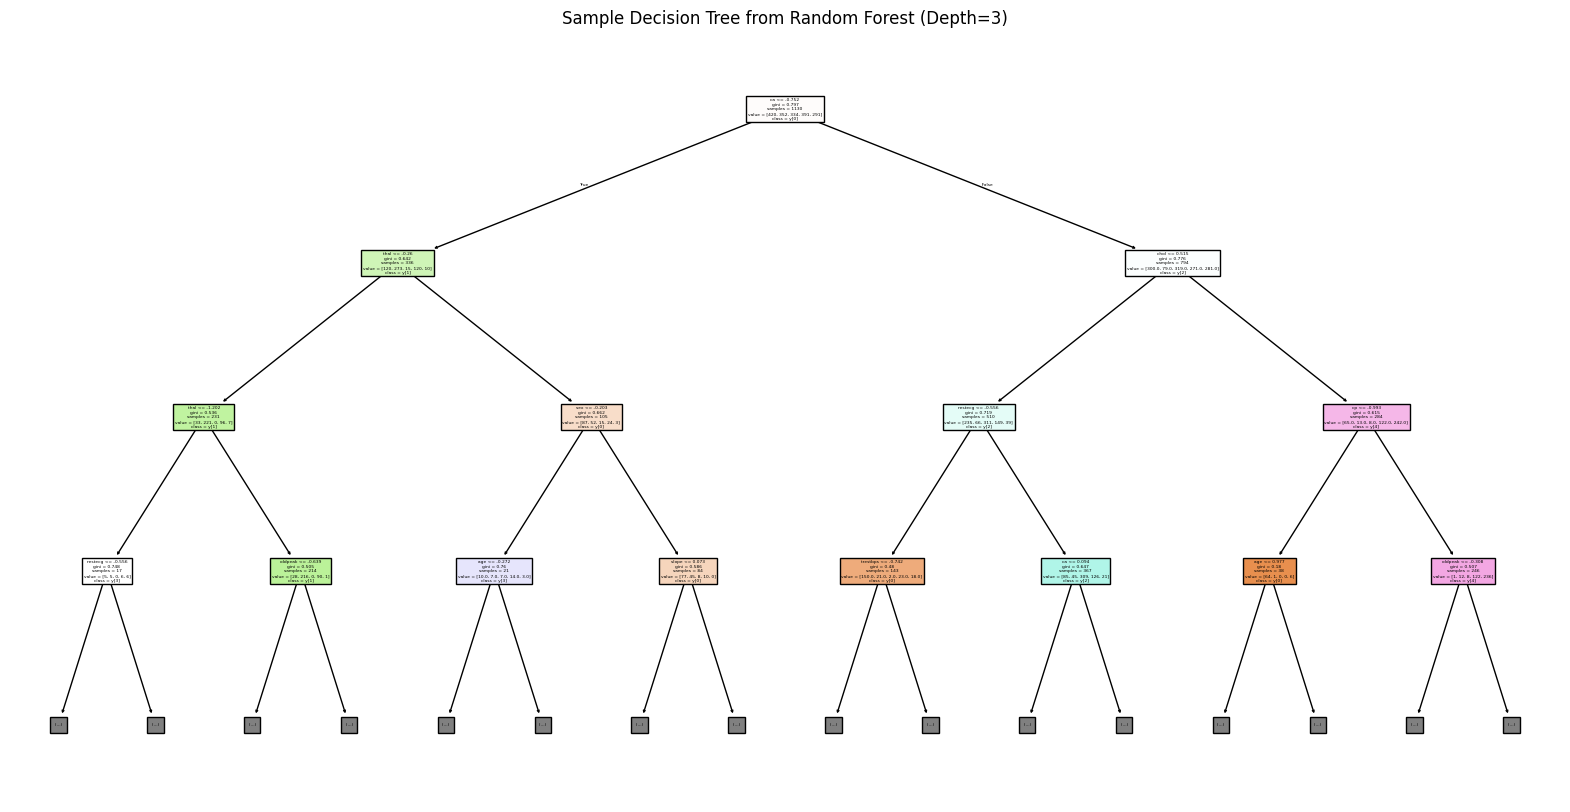

In [99]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=True, filled=True, max_depth=3)
plt.title("Sample Decision Tree from Random Forest (Depth=3)")
plt.show()


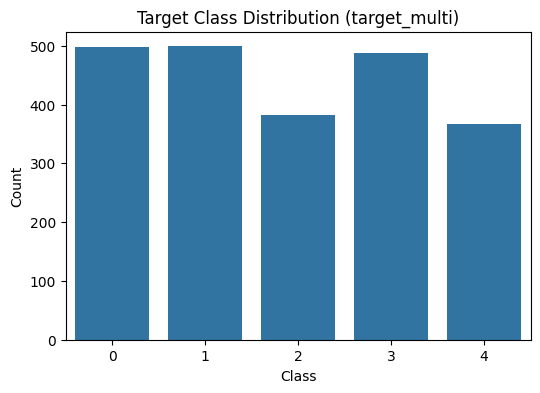

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Target Class Distribution (target_multi)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
